# Week 12 Assignment

**Author:** Polly Zheng  
**Course:** Week 12 Assignment  
**Purpose:** The purpose of this notebook is to analyze the IMDB Top 100 movies dataset using Python. The dataset was originally fetched through an API in VS Code and exported as a CSV. In this notebook, we load the CSV directly, extract plot themes from movie descriptions using spaCy NLP, analyze genre distribution trends, generate visualizations, and summarize the thematic patterns of highly rated films.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from collections import Counter

In [7]:
df = pd.read_csv("imdb_top100.csv")
df.head()

,rank,title,description,image,big_image,genre,thumbnail,rating,id,year,imdbid,imdb_link
0,1,The Shawshank Redemption,Two imprisoned men bond over a number of years...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,['Drama'],https://m.media-amazon.com/images/M/MV5BMDFkYT...,9.3,top1,1994,tt0111161,https://www.imdb.com/title/tt0111161
1,2,The Godfather,The aging patriarch of an organized crime dyna...,https://m.media-amazon.com/images/M/MV5BM2MyNj...,https://m.media-amazon.com/images/M/MV5BM2MyNj...,"['Crime', 'Drama']",https://m.media-amazon.com/images/M/MV5BM2MyNj...,9.2,top2,1972,tt0068646,https://www.imdb.com/title/tt0068646
2,3,The Dark Knight,When the menace known as the Joker wreaks havo...,https://m.media-amazon.com/images/M/MV5BMTMxNT...,https://m.media-amazon.com/images/M/MV5BMTMxNT...,"['Action', 'Crime', 'Drama']",https://m.media-amazon.com/images/M/MV5BMTMxNT...,9.0,top3,2008,tt0468569,https://www.imdb.com/title/tt0468569
3,4,The Godfather Part II,The early life and career of Vito Corleone in ...,https://m.media-amazon.com/images/M/MV5BMWMwMG...,https://m.media-amazon.com/images/M/MV5BMWMwMG...,"['Crime', 'Drama']",https://m.media-amazon.com/images/M/MV5BMWMwMG...,9.0,top4,1974,tt0071562,https://www.imdb.com/title/tt0071562
4,5,12 Angry Men,The jury in a New York City murder trial is fr...,https://m.media-amazon.com/images/M/MV5BMWU4N2...,https://m.media-amazon.com/images/M/MV5BMWU4N2...,"['Crime', 'Drama']",https://m.media-amazon.com/images/M/MV5BMWU4N2...,9.0,top5,1957,tt0050083,https://www.imdb.com/title/tt0050083


## Extracting Plot Themes Using spaCy NLP
I now analyze the movie descriptions to identify the most dominant words and themes across the Top 100 movies.  
This helps reveal common storytelling elements among highly rated films.

In [11]:
nlp = spacy.load("en_core_web_sm")

def extract_keywords(text):
    doc = nlp(text)
    keywords = [
        token.lemma_.lower()
        for token in doc
        if token.pos_ in ["NOUN", "VERB"] and not token.is_stop
    ]
    return [w for w, c in Counter(keywords).most_common(5)]

df["plot_keywords"] = df["description"].apply(extract_keywords)
df[["title", "plot_keywords"]].head()

,title,plot_keywords
0,The Shawshank Redemption,"[man, bond, number, year, find]"
1,The Godfather,"[age, patriarch, organize, crime, dynasty]"
2,The Dark Knight,"[menace, know, wreak, havoc, chaos]"
3,The Godfather Part II,"[life, career, portray, son, expand]"
4,12 Angry Men,"[jury, murder, trial, frustrate, member]"


## Genre Distribution Analysis
Next, I analyze the frequency of movie genres across the Top 100 list to determine what genre types dominate critically acclaimed films.
Which is not for this assignment only yet for my final project practice. 

In [14]:
all_genres = []
for g in df["genre"]:
    if isinstance(g, str) and g.startswith("["):
        g = eval(g)
    all_genres.extend(g)

genre_counts = Counter(all_genres)
genre_df = pd.DataFrame(genre_counts.items(), columns=["Genre", "Count"]).sort_values(
    by="Count", ascending=False
)

genre_df.head()

,Genre,Count
0,Drama,70
5,Adventure,27
2,Action,23
1,Crime,20
11,Mystery,14


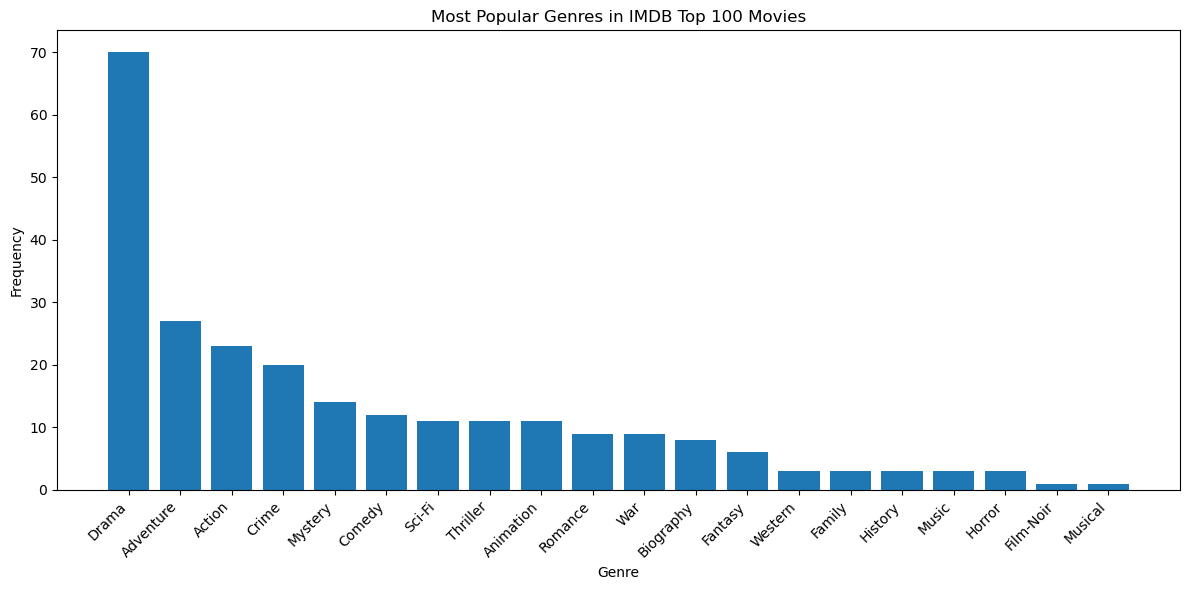

In [16]:
plt.figure(figsize=(12, 6))
plt.bar(genre_df["Genre"], genre_df["Count"])
plt.xticks(rotation=45, ha="right")
plt.title("Most Popular Genres in IMDB Top 100 Movies")
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### Reflection
This notebook reflects the same workflow originally completed in VS Code using API retrieval and CSV export.  
In this version, I reproduced the full analysis using the CSV file only, ensuring a clean and reproducible workflow for grading and documentation.